<a href="https://colab.research.google.com/github/DuarteVn/Eletric-Vehicle-sales/blob/main/EV_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Importando Biblioteca

In [1]:
# %tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
tf.__version__

'2.18.0'

# Etapa 2: Importando base de dados

In [2]:
#Permissão para acessar arquivos doo Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Leitura do arquivo csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Excel/EVGlobal.csv')
df.head()

Mounted at /content/drive


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


# Visualização da base de dados

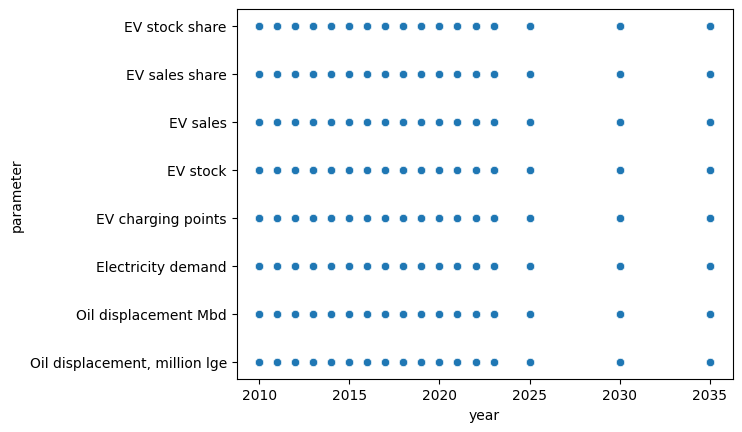

In [3]:
sns.scatterplot(x='year', y='parameter', data=df);

In [4]:
# Limpar possíveis espaços em branco
df['parameter'] = df['parameter'].str.strip()

# Filtrar apenas os dados de EV sales até 2023
ev_sales = df[(df['parameter'] == 'EV sales') & (df['year'] <= 2023)]


In [5]:
sales_by_year = ev_sales.groupby('year')['value'].sum().reset_index()


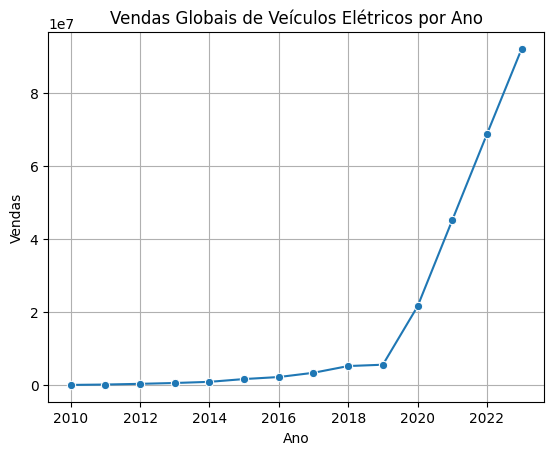

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='year', y='value', data=sales_by_year, marker='o')
plt.title('Vendas Globais de Veículos Elétricos por Ano')
plt.xlabel('Ano')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()


# Etapa 4: Configuração da base de dados de treinamento

In [7]:
x_train = sales_by_year[['year']]
y_train = sales_by_year['value']

In [8]:
print(x_train.shape)
print(y_train.shape)

(14, 1)
(14,)


In [9]:
x_train.head(12654)

,year
0,2010
1,2011
2,2012
3,2013
4,2014
5,2015
6,2016
7,2017
8,2018
9,2019


# Etapa 5: Criação e construção do modelo

In [10]:
# Normalização
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(x_train)
y_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=[1], activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(X_scaled, y_scaled, epochs=500, verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0659
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0633
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0611
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0592
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0577
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0565
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0555
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.0548
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0542
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - loss: 0.0536
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0529
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0520
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0512
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0509
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0506
Epoch 16/500
1/1 ━━

# Avaliação do modelo

In [14]:
anos_futuros = np.array([[2024], [2025], [2026], [2027], [2028], [2029], [2030]])
anos_futuros_scaled = scaler_x.transform(anos_futuros)
predicoes_scaled = model.predict(anos_futuros_scaled)
predicoes = scaler_y.inverse_transform(predicoes_scaled)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [15]:
for ano, valor in zip(anos_futuros.flatten(), predicoes.flatten()):
    print(f"{ano}: {int(valor)} veículos")

2024: 105211536 veículos
2025: 119981904 veículos
2026: 134752272 veículos
2027: 149522656 veículos
2028: 164293040 veículos
2029: 179063408 veículos
2030: 193833808 veículos


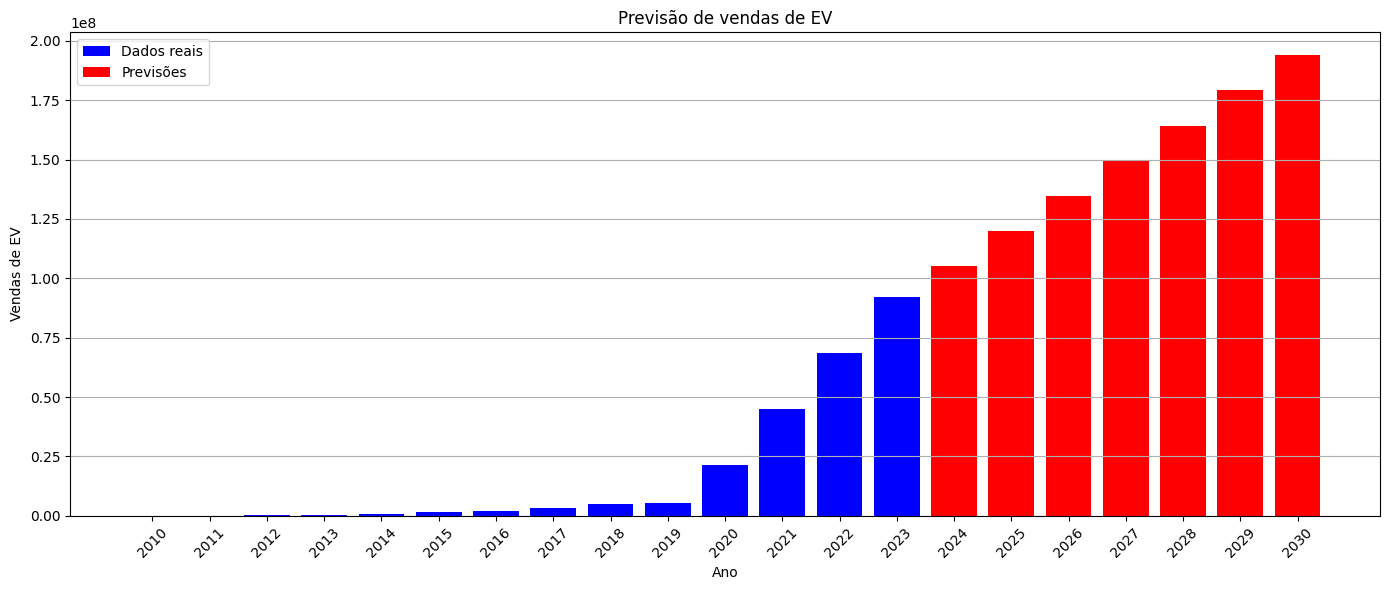

In [20]:
plt.figure(figsize=(14, 6))

plt.bar(x_train['year'], y_train, color='blue', label='Dados reais')
plt.bar(anos_futuros.flatten(), predicoes.flatten(), color='red', label='Previsões')

plt.xlabel('Ano')
plt.ylabel('Vendas de EV')
plt.title('Previsão de vendas de EV')

plt.legend(loc='upper left')
plt.grid(axis='y')
plt.xticks(range(2010, 2031, 1), rotation=45)

plt.tight_layout()
plt.savefig("previsao_modelo_ev.png", dpi=300)
plt.show()


In [17]:
import plotly.express as px
df_pred = pd.DataFrame({'Ano': anos_futuros.flatten(), 'Previsão': predicoes.flatten()})
df_real = pd.DataFrame({'Ano': x_train['year'], 'Vendas': y_train})

fig = px.line(df_real, x='Ano', y='Vendas', title='Previsão de Vendas de EV')
fig.add_scatter(x=df_pred['Ano'], y=df_pred['Previsão'], mode='lines+markers', name='Previsão')
fig.show()


           year     value
year   1.000000  0.120782
value  0.120782  1.000000


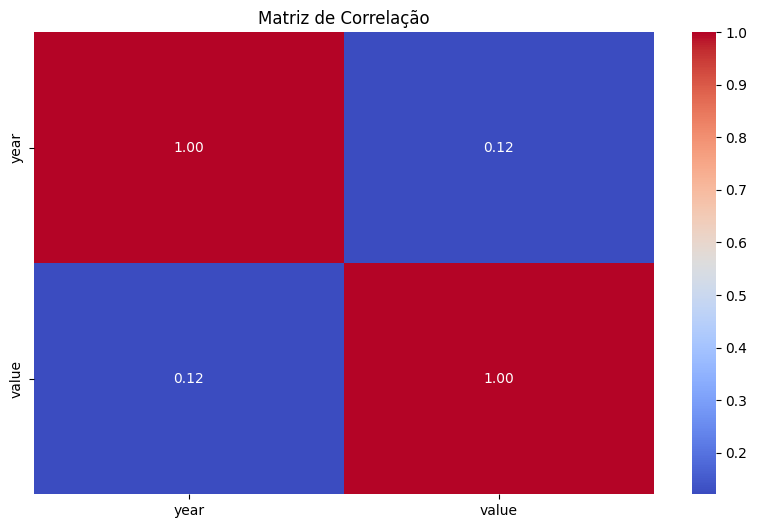

In [18]:
df_numerico = df.select_dtypes(include=['float64', 'int64'])

matriz_corr = df_numerico.corr()

print(matriz_corr)

plt.figure(figsize=(10, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()


In [22]:
df_pred.to_csv("previsoes_ev.csv", index=False)
